## Crawling

###### requests(데이터 가져오기)
###### BeautifulSoup(가져온 데이터를 필요한 것만 가져온다.)
- find / find_all
- select_one / select

In [15]:
import requests as req

In [17]:
result = req.get('https://www.naver.com')
# URL 호출 후 응답코드 확인
result.status_code

200

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
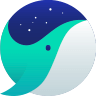
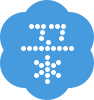

In [19]:
# 응답결과 확인
result.text
# encoding 처리
result.encoding = 'None' # utf-8로 써도 된다.
result.text

In [20]:
import requests
param = { 'page': 1, 'search': '검색어' }
res = requests.get(
'http://ggoreb.com/python/request.jsp', params=param)
print(res.text)




method : GET<br>
query string<br>
key : search, value : 검색어<br>
key : page, value : 1<br>
<br><br>
header<br>
key : accept, value : */*<br>
key : Accept-Encoding, value : gzip, deflate, br<br>
key : connection, value : close<br>
key : host, value : ggoreb.com<br>
key : HOSTING_CONTINENT_CODE, value : AS<br>
key : HOSTING_COUNTRY_CODE, value : KR<br>
key : HOSTING_WHITE_IP, value : false<br>
key : user-agent, value : python-requests/2.26.0<br>
key : X-Forwarded-Proto, value : http<br>
key : X-SERVER_PORT, value : 80<br>
key : X-SERVER_PROTOCOL, value : HTTP/1.1<br>
key : X-SIMPLEXI, value : 125.141.68.176<br>
key : content-length, value : 0<br>



In [21]:
import requests
header = { 'user-agent': 'android', 'accept-language': 'en' }
res = requests.get(
'http://ggoreb.com/python/request.jsp', headers=header)
print(res.text)




method : GET<br>
query string<br>
<br><br>
header<br>
key : accept, value : */*<br>
key : Accept-Encoding, value : gzip, deflate, br<br>
key : accept-language, value : en<br>
key : connection, value : close<br>
key : host, value : ggoreb.com<br>
key : HOSTING_CONTINENT_CODE, value : AS<br>
key : HOSTING_COUNTRY_CODE, value : KR<br>
key : HOSTING_WHITE_IP, value : false<br>
key : user-agent, value : android<br>
key : X-Forwarded-Proto, value : http<br>
key : X-SERVER_PORT, value : 80<br>
key : X-SERVER_PROTOCOL, value : HTTP/1.1<br>
key : X-SIMPLEXI, value : 125.141.68.176<br>
key : content-length, value : 0<br>



## HTTP 통신으로 4개의 메서드 사용

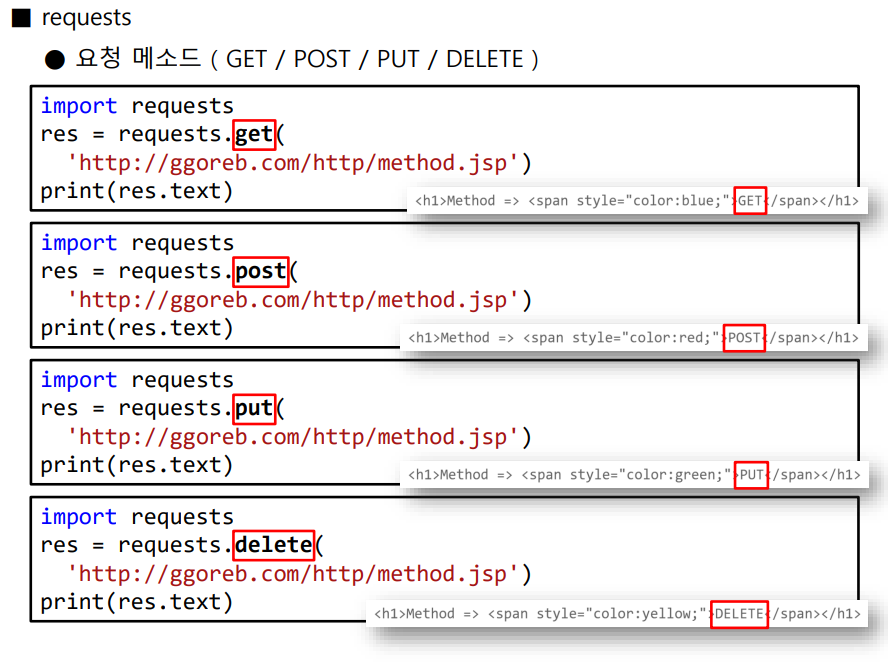

In [23]:
import requests
result = requests.get(
    'http://ggoreb.com/python/html/data1.html').text
s_idx = 0
e_idx = 0
while True:
    s_idx = result.find('<td>', e_idx)
    if s_idx == -1:
        break
    e_idx = result.find('</td>', s_idx)
    print(result[s_idx + 4 : e_idx])

Jill
Smith
50
Eve
Jackson
94
John
Doe
80


<a href="http://google.com" target="_blank">Google</a>
<a href="01_html_1.md">html basic</a>

### 

In [25]:
import requests
from bs4 import BeautifulSoup as bs
address = 'http://ggoreb.com/python/html/example.html'
res = requests.get(address)
res.encoding = None

In [26]:
soup = bs(res.text)

In [28]:
print(soup.find('title').text)

Page title


In [34]:
p_list = soup.find_all('p')
for p in p_list:
    print(p.text)

a
b
c
d
e
f
g
h
i
This is a paragraph.
This is another paragraph.


In [35]:
print(soup.find('title').attrs.get('class'))
print(soup.find_all('div')[1]['class'])
print(soup.find_all('div')[2].get_attribute_list('id'))

None
['ex_class']
['ex_id']


In [61]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://finance.naver.com')
res.encoding = None
soup = bs(res.text)

In [66]:
p_div = soup.find(attrs={'class':'section_stock_market'})

In [67]:
p_div.find_all(attrs={'class':'num'})

[<span class="num">2,695.05</span>,
 <span class="num">904.75</span>,
 <span class="num">355.08</span>]

In [77]:
import requests
address = 'https://comic.naver.com/webtoon/list?titleId=727188'
res = requests.get(address)
res.encoding = None

In [78]:
from bs4 import BeautifulSoup as bs
soup = bs(res.text)

In [82]:
[ s.text for s in soup.select('.title > a')]

['157화 : 바뀐 사람들',
 '156화 : 군단장 vs 사령관',
 '155화 : 폐급과 폐급의 만남',
 '154화 : 호영이네 아빠의 위기',
 '153화 : 실력차이',
 '152화 : 한계돌파2',
 '151화 : 한계돌파',
 '150화 : 스펀지 같은 성재',
 '149화 : 빽이 센 윤호영',
 '148화 : 호영아, 그건 아니야']

In [104]:
import requests
res = requests.get('https://tiobe.com/tiobe-index/')
res.encoding = None
from bs4 import BeautifulSoup as bs
soup = bs(res.text)

In [106]:
[s.text for s in soup.select('.td-top20 + td')]

['Python',
 'C',
 'Java',
 'C++',
 'C#',
 'Visual Basic',
 'JavaScript',
 'Assembly language',
 'SQL',
 'PHP',
 'R',
 'Delphi/Object Pascal',
 'Go',
 'Swift',
 'Ruby',
 'Classic Visual Basic',
 'Objective-C',
 'Perl',
 'Lua',
 'MATLAB']

In [114]:
import requests
from bs4 import BeautifulSoup as bs
url=  'https://mois.go.kr/frt/bbs/type010/commonSelectBoardList.do?bbsId=BBSMSTR_000000000008'
param = {'pageIndex' : 3}
res = requests.post(url, params = param)
soup = bs(res.text)

In [115]:
soup.select('div.wrap>a')

[<a href="/frt/bbs/type010/commonSelectBoardArticle.do;jsessionid=qqxWSJbCo9rAUxwpQA2Wp8nE.node40?bbsId=BBSMSTR_000000000008&amp;nttId=91583" onclick="javascript:fn_egov_inqire_notice('91583', 'BBSMSTR_000000000008'); return false;">특수교육대상자 교육 여건, 데이터로 개선한다 </a>,
 <a href="/frt/bbs/type010/commonSelectBoardArticle.do;jsessionid=qqxWSJbCo9rAUxwpQA2Wp8nE.node40?bbsId=BBSMSTR_000000000008&amp;nttId=91581" onclick="javascript:fn_egov_inqire_notice('91581', 'BBSMSTR_000000000008'); return false;">가맹점 재등록 제한기간 도입으로 지역사랑상품권 부정유통 막는다 </a>,
 <a href="/frt/bbs/type010/commonSelectBoardArticle.do;jsessionid=qqxWSJbCo9rAUxwpQA2Wp8nE.node40?bbsId=BBSMSTR_000000000008&amp;nttId=91579" onclick="javascript:fn_egov_inqire_notice('91579', 'BBSMSTR_000000000008'); return false;">함께 발전하고 주민이 중심이 되는 지역 만들기에 앞장선다 </a>,
 <a href="/frt/bbs/type010/commonSelectBoardArticle.do;jsessionid=qqxWSJbCo9rAUxwpQA2Wp8nE.node40?bbsId=BBSMSTR_000000000008&amp;nttId=91586" onclick="javascript:fn_egov_inqire_notice('91586'

In [117]:
import requests
url = 'https://dapi.kakao.com/v2/local/search/address.xml'
param = { 'query': '제주 서귀포시 성산읍 성산리 1' }
header = { 'Authorization': 'KakaoAK f33c0bdc28cf3a49a87aeb9f5e218e65' }
res = requests.get(url, params=param, headers=header)

In [118]:
from bs4 import BeautifulSoup as bs
soup = bs(res.text)

In [123]:
result = soup.find('result')
documents = result.find('documents')
address = documents.find('address')
x = address.find('x')
y = address.find('y')
x.text, y.text

('126.942496776521', '33.458409737774')

In [125]:
import requests
res = requests.get('http://ggoreb.com/python/json/data1.jsp')
parse = res.json() # JSON → Dictionary
print(type(parse))
print(parse['age'])
print(parse.get('name'))

<class 'dict'>
10
GGoReb


In [11]:
import requests
from bs4 import BeautifulSoup

url = 'http://corners.gmarket.co.kr/Bestsellers'
res = requests.get(url)
res

<Response [200]>

In [12]:
soup = BeautifulSoup(res.text)

In [14]:
elements = soup.select(".best-list")[1].select("li")
len(elements)

200